## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

Rangga Rijasa - 0706022210019

### Import Library

Import the necessary libraries

In [2]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/property_dataset.csv')
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [4]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [6]:
missing_values = df.isnull().sum()
print("\nMissing Values Count:\n", missing_values)




Missing Values Count:
 Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64


2.

In [7]:
null_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Null Values:\n", null_percentage)

imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)




Percentage of Null Values:
 Area Category                     0.324675
Nama Daerah                       0.324675
Luas Tanah (m2)                   0.324675
Luas Bangunan (m2)                0.324675
Jumlah Kamar                      0.324675
Jumlah Kamar Mandi                0.649351
Tingkat/Lantai                    0.649351
Harga Penawaran (dari Owner)      0.324675
Terjual/Belum                     0.324675
Arah Hadap Rumah                 26.948052
Posisi Rumah                     37.662338
Lebar Jalan Depan Rumah (ROW)    13.636364
dtype: float64


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [8]:

for column in df.columns:
    if df[column].dtype == 'object':
        df_imputed[column] = df_imputed[column].astype(str)
    else:
        df_imputed[column] = df_imputed[column].astype(float)
        
df_imputed.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [9]:
df_imputed.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Drop the column 'Nama Daerah' because all the values are different.

In [10]:
df_imputed.drop(columns=['Nama Daerah'], inplace=True)
df_imputed.head()



,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [11]:

label_encoder = LabelEncoder()

df_imputed['Area Category'] = label_encoder.fit_transform(df_imputed['Area Category'])
df_imputed['Arah Hadap Rumah'] = label_encoder.fit_transform(df_imputed['Arah Hadap Rumah'])
df_imputed['Posisi Rumah'] = label_encoder.fit_transform(df_imputed['Posisi Rumah'])
df_imputed['Terjual/Belum'] = label_encoder.fit_transform(df_imputed['Terjual/Belum'])
df_imputed['Lebar Jalan Depan Rumah (ROW)'] = label_encoder.fit_transform(df_imputed['Lebar Jalan Depan Rumah (ROW)'])

df_imputed.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,0,3,2,0
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [12]:
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].str.replace(r'\D', '', regex=True)
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].astype('int64')

check the data type

In [13]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  308 non-null    int32  
 1   Luas Tanah (m2)                308 non-null    float64
 2   Luas Bangunan (m2)             308 non-null    float64
 3   Jumlah Kamar                   308 non-null    float64
 4   Jumlah Kamar Mandi             308 non-null    float64
 5   Tingkat/Lantai                 308 non-null    float64
 6   Harga Penawaran (dari Owner)   308 non-null    int64  
 7   Terjual/Belum                  308 non-null    int32  
 8   Arah Hadap Rumah               308 non-null    int32  
 9   Posisi Rumah                   308 non-null    int32  
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 20.6 KB


Change the data types from:

- float to int
- object to int

In [14]:
print(df_imputed.columns)

df_imputed = df_imputed.astype({
    'Area Category': 'int64',
    'Luas Tanah (m2)': 'int64',
    'Luas Bangunan (m2)': 'int64',
    'Jumlah Kamar': 'int64',
    'Jumlah Kamar Mandi': 'int64',
    'Tingkat/Lantai ': 'int64',  
    'Harga Penawaran (dari Owner)': 'int64',
    'Terjual/Belum': 'int64',
    'Arah Hadap Rumah': 'int64',
    'Posisi Rumah': 'int64',
    'Lebar Jalan Depan Rumah (ROW)': 'int64'
})

df_imputed.info()

Index(['Area Category', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah',
       'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah          

4.

In [15]:
# scaling data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_imputed)
data_scaled = pd.DataFrame(data_scaled, columns=df_imputed.columns)
data_scaled.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.004372,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.825581
1,-1.677824,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,0.220834
2,1.004372,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.825581
3,0.110307,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.825581
4,-0.783759,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.825581


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'SSE')

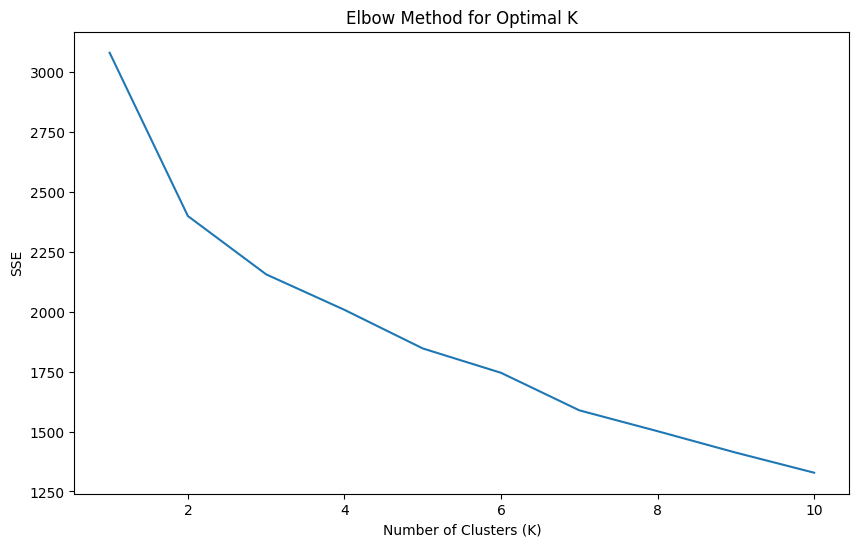

In [16]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
     

In [17]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

The best k for your model is: 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(data_scaled)
y_pred

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2,

In [19]:
data_scaled['Cluster'] = y_pred


In [20]:
data_original = scaler.inverse_transform(data_scaled.drop(columns=['Cluster'], errors='ignore'))

data_original_df = pd.DataFrame(data_original, columns=df_imputed.columns)  

data_original_df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0


In [21]:
data_original_df['Cluster'] = data_scaled['Cluster'].values

data_original_df.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0,2
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0,2
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0,2
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0,1


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [22]:
cluster_summary = {}

numeric_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Harga Penawaran (dari Owner)']
categorical_columns = ['Area Category', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
                       'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']


grouped_data = data_original_df.groupby('Cluster')

for column in numeric_columns:
    cluster_summary[f'{column} Average'] = grouped_data[column].mean()
    cluster_summary[f'{column} Minimum'] = grouped_data[column].min()
    cluster_summary[f'{column} Maximum'] = grouped_data[column].max()

for column in categorical_columns:
    if column in data_original_df.columns:
        cluster_summary[f'{column} Mode'] = grouped_data[column].agg(lambda x: ', '.join(map(str, x.mode())) if not x.mode().empty else None)
        cluster_summary[f'{column} Minimum'] = grouped_data[column].min()
        cluster_summary[f'{column} Maximum'] = grouped_data[column].max()
    else:
        print(f"Column '{column}' not found in the dataframe.")

summary_df = pd.DataFrame(cluster_summary)

summary_df.T

Cluster,0,1,2
Luas Tanah (m2) Average,177.966667,516.215385,132.875817
Luas Tanah (m2) Minimum,47.0,200.0,14.0
Luas Tanah (m2) Maximum,495.0,1561.0,360.0
Luas Bangunan (m2) Average,207.888889,591.4,163.326797
Luas Bangunan (m2) Minimum,34.0,250.0,14.0
Luas Bangunan (m2) Maximum,500.0,1200.0,400.0
Harga Penawaran (dari Owner) Average,3223699999.977778,14233922907.661539,2150763682.418301
Harga Penawaran (dari Owner) Minimum,325000000.0,2500000000.0,160000000.0
Harga Penawaran (dari Owner) Maximum,19500000000.0,99000000000.0,8000000000.0
Area Category Mode,1.0,1.0,3.0


In [23]:
# count data from each cluster

cluster_count = data_original_df['Cluster'].value_counts().reset_index()

cluster_count.columns = ['KMeans', 'Count']

cluster_count


,KMeans,Count
0,2,153
1,0,90
2,1,65


In [24]:
# write down your interpretation from the cluster that you have been made

# Cluster 0
print("\nCluster 0:")
print("This cluster has moderate-sized houses with an average land area of 177.97 m² and building area of 207.89 m².")
print("Offer prices are relatively lower compared to other clusters, averaging 3.22 billion IDR.")
print("Houses are mostly unsold, with most properties having 4 rooms and 3 bathrooms, situated on the 2nd floor.")

# Cluster 1
print("\nCluster 1:")
print("Cluster 1 consists of larger properties, with an average land area of 516.22 m² and building area of 591.4 m².")
print("The offer prices are significantly higher, with an average of 14.23 billion IDR.")
print("These properties tend to be larger with 5 rooms and 5 bathrooms, often found on the 2nd to 4th floors, and are unsold.")

# Cluster 2
print("\nCluster 2:")
print("Cluster 2 has smaller properties, with an average land area of 132.88 m² and building area of 163.33 m².")
print("Offer prices are the lowest in this cluster, averaging 2.15 billion IDR.")
print("These homes generally have 4 rooms and 2 bathrooms, located on the 1st to 3rd floors, and are also unsold.")



Cluster 0:
This cluster has moderate-sized houses with an average land area of 177.97 m² and building area of 207.89 m².
Offer prices are relatively lower compared to other clusters, averaging 3.22 billion IDR.
Houses are mostly unsold, with most properties having 4 rooms and 3 bathrooms, situated on the 2nd floor.

Cluster 1:
Cluster 1 consists of larger properties, with an average land area of 516.22 m² and building area of 591.4 m².
The offer prices are significantly higher, with an average of 14.23 billion IDR.
These properties tend to be larger with 5 rooms and 5 bathrooms, often found on the 2nd to 4th floors, and are unsold.

Cluster 2:
Cluster 2 has smaller properties, with an average land area of 132.88 m² and building area of 163.33 m².
Offer prices are the lowest in this cluster, averaging 2.15 billion IDR.
These homes generally have 4 rooms and 2 bathrooms, located on the 1st to 3rd floors, and are also unsold.


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Text(0, 0.5, 'Silhouette Scores')

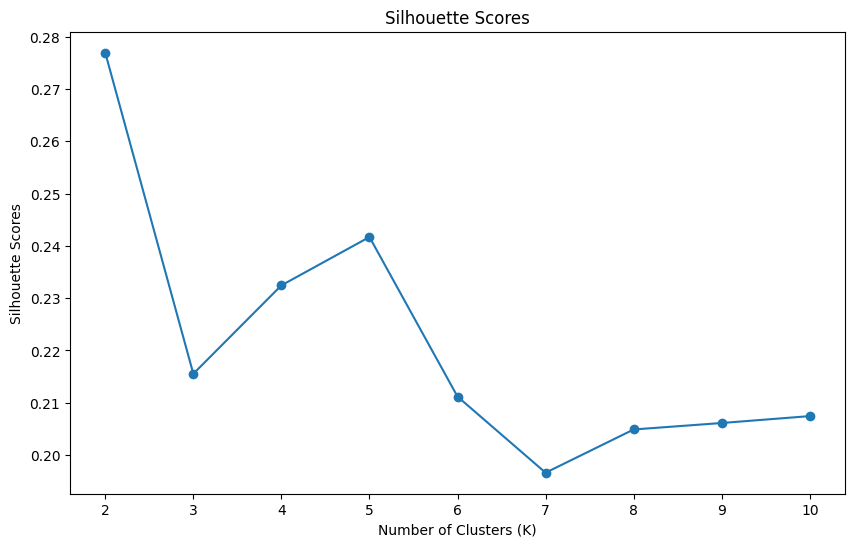

In [25]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []
for k in range(2,11):
    cluster_labels = fcluster(linkage(data_scaled, method="ward"), k, criterion='maxclust')
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Scores')

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [26]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(data_scaled)
y_hc

array([2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2,

In [27]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_labels


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2,

In [28]:
# Extract only the original scaled feature data (assuming the first 11 columns are features)
features_scaled = data_scaled.iloc[:, :11]  # Adjust the slice as needed if columns differ

df_features_inverse = pd.DataFrame(scaler.inverse_transform(features_scaled), columns=features_scaled.columns)

df_features_inverse['KMeans_Cluster'] = kmeans_labels
df_features_inverse['Agglo_Cluster'] = y_hc

df_features_inverse.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans_Cluster,Agglo_Cluster
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0,2,2
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0,2,1
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0,2,2
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0,1,1


Display the cluster summary in the form of a dataframe.

In [29]:

cluster_summary = {}

# Daftar kolom continuous dan categorical
continuous_columns = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Harga Penawaran (dari Owner)']
categorical_columns = ['Area Category', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
                       'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Mengelompokkan data berdasarkan 'Cluster'
grouped = df_features_inverse.groupby('Agglo_Cluster')

for col in continuous_columns:
    cluster_summary[f'{col} Mean'] = grouped[col].mean()
    cluster_summary[f'{col} Min'] = grouped[col].min()
    cluster_summary[f'{col} Max'] = grouped[col].max()

for col in categorical_columns:
    if col in data_original_df.columns:
        cluster_summary[f'{col} Mode'] = grouped[col].agg(lambda x: ', '.join(map(str, x.mode())) if not x.mode().empty else None)
        cluster_summary[f'{col} Min'] = grouped[col].min()
        cluster_summary[f'{col} Max'] = grouped[col].max()
    else:
        print(f"Column '{col}' Not Found")

cluster_summary_df = pd.DataFrame(cluster_summary)

cluster_summary_df.T
     


Agglo_Cluster,0,1,2
Luas Tanah (m2) Mean,178.090909,514.307692,130.833333
Luas Tanah (m2) Min,34.0,170.0,14.0
Luas Tanah (m2) Max,495.0,1561.0,360.0
Luas Bangunan (m2) Mean,213.323232,581.061538,161.472222
Luas Bangunan (m2) Min,34.0,170.0,14.0
Luas Bangunan (m2) Max,600.0,1200.0,485.0
Harga Penawaran (dari Owner) Mean,3223806958.444445,14138538292.261538,2126687184.1875
Harga Penawaran (dari Owner) Min,325000000.0,2500000000.0,160000000.0
Harga Penawaran (dari Owner) Max,14500000000.0,99000000000.0,8000000000.0
Area Category Mode,1.0,1.0,3.0


In [30]:
cluster_summary = df_features_inverse['Agglo_Cluster'].value_counts().reset_index()

cluster_summary.columns = ['KMeans', 'Count']

cluster_summary

,KMeans,Count
0,2,144
1,0,99
2,1,65


In [31]:
print("""
Cluster 1 represents high-end, large-scale, and premium properties, likely appealing to affluent buyers. However, the data shows no sales yet, possibly indicating overpriced or niche markets.
Cluster 0 features medium-scale properties that cater to middle-class buyers, but accessibility (narrower roads) and pricing may affect market uptake.
Cluster 2 targets budget-conscious buyers with smaller, affordable properties. However, extremely narrow road access and lack of sales suggest challenges in marketability.
The clusters align with distinct market segments, helping identify property traits for targeted marketing or improvement.
""")



Cluster 1 represents high-end, large-scale, and premium properties, likely appealing to affluent buyers. However, the data shows no sales yet, possibly indicating overpriced or niche markets.
Cluster 0 features medium-scale properties that cater to middle-class buyers, but accessibility (narrower roads) and pricing may affect market uptake.
Cluster 2 targets budget-conscious buyers with smaller, affordable properties. However, extremely narrow road access and lack of sales suggest challenges in marketability.
The clusters align with distinct market segments, helping identify property traits for targeted marketing or improvement.



**Hierarchical Visualization**

Single Linkage

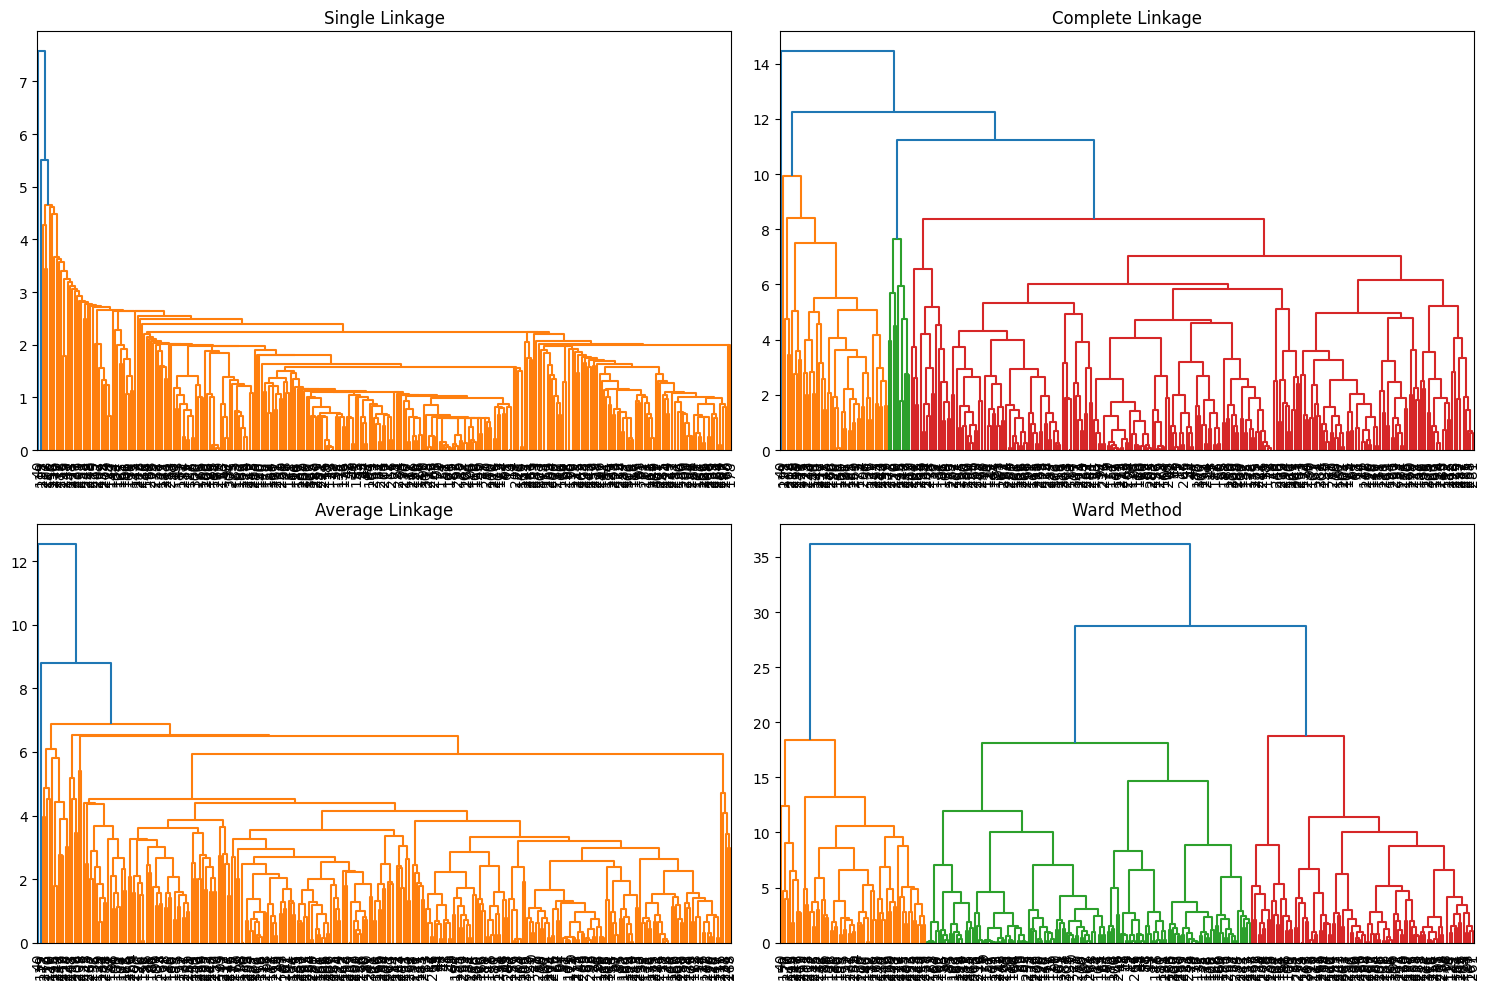

In [33]:
linkage_methods = {
    "Single Linkage": "single",
    "Complete Linkage": "complete",
    "Average Linkage": "average",
    "Ward Method": "ward"
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, (title, method) in enumerate(linkage_methods.items()):
    linked = linkage(data_scaled, method=method)
    dendrogram(linked, ax=axes[i], leaf_rotation=90, leaf_font_size=10)
    axes[i].set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()

complete linkage

average linkage

ward method